# EP4210 Computational Physics
Module 6

## Partial Differential Equations

$$\frac{\partial^2 V}{\partial x^2} + \frac{\partial^2 V}{\partial y^2} = s(x, y)$$
We discretise the space into $dx$ and $dy$ and use finite difference method to approximate the derivatives in 2 dimensions. The discretised equation is:
$$\frac{V_{n+1,m} - 2V_{n,m} + V_{n-1,m}}{\Delta x^2} + \frac{V_{n,m +1} - 2V_{n,m} + V_{n,m-1}}{\Delta y^2} = s_{n, m}$$
We can simplify the equation to get the following form:
$$V_{n,m}=\frac{\Delta y^2(V_{n+1, m} + V_{n-1, m})}{2(\Delta x^2 + \Delta y^2)} + \frac{\Delta x^2(V_{n, m+1} + V_{n, m-1})}{2(\Delta x^2 + \Delta y^2)} - \frac{\Delta x^2 \Delta y^2 s_{n, m}}{2(\Delta x^2 + \Delta y^2)} $$

### Jacobi Iteration Method

$$V_{n, m} = \frac{V_{n+1, m} + V_{n-1, m}+ V_{n, m+1} + V_{n, m-1}-s_{n,m}\Delta^2}{4}$$
The value at the center of the grid is calculated using the values of the four surrounding grid points. 
- We first assume a solution $V^0$ at all the grid points
- At the next step, $V^1$ is taken by taking the above propagation equation but with $V^1_{n, m}$ on LHS and $V^0$ s on RHS.
- This process is repeated until the solution converges. The solution is said to have converged when the difference between successive solutions is less than a specified tolerance. This is found by the $L^2$ norm, $L^2 = \sqrt{\sum_{n, m} |V_{n, m}^{i+1}-V_{n, m}^{i}|^2}$
- The convergence also needs to be checked by taking different values of $N, M$ too.

Example

<marquee> Redo this </marquee>
Solve the Laplace equation $\nabla^2 V = 0$ in a square domain, $x, y \in [0, 1]$ with boundary condition $V(x=0) = \sin (2\pi y)$. Take $N=M=100$

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [12]:
a, b = 0, 1
N, M = 100, 100

x = np.linspace(a, b, N+2)
y = np.linspace(a, b, M+2)

dx = x[1] - x[0]
dy = y[1] - y[0]

boundary = lambda x, y: np.sin(2*np.pi*y)

eps = 1e-2

L2 = 1

z = np.zeros((N+2, M+2))
z_prev = np.zeros((N+2, M+2))

z_prev[:, 0] = boundary(x[0], y)
z[:, 0] = boundary(x[0], y)
# z_prev[:, M-1] = [boundary(j, y[M-1]) for j in y]
# z_prev[0, :] = boundary(x[0], y)
#z_prev[N-1, :] = boundary(x[N-1], y)


In [3]:
s = lambda x, y: 0

In [13]:
for _ in range(1000):
    for i in range(1, M+1):
        for j in range(1, N+1):
            temp = z_prev[i, j]
            temp += z_prev[i-1, j]+ z_prev[i+1, j]
            temp += z_prev[i, j-1] + z_prev[i, j+1]
            temp -= s(x[i], y[j])*dx*dy
            temp /= 4
            z[i, j] = temp
    # L2 = np.sqrt(np.sum(z-z_prev)**2)
    z_prev = np.copy(z)
    

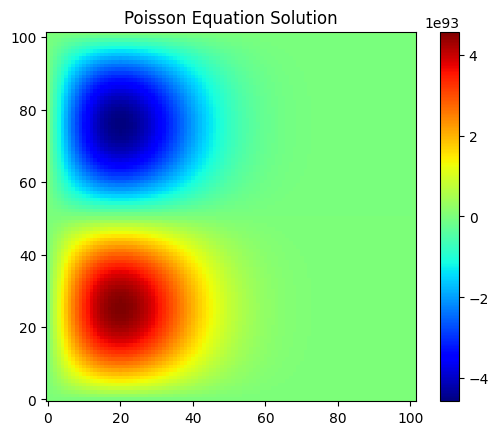

In [14]:
plt.imshow(z, cmap='jet', interpolation='nearest', origin='lower')
plt.colorbar()
plt.title("Poisson Equation Solution")
plt.show()

step=  0 l2 =  1.776583800443987
step=  1 l2 =  0.9916039270196665
step=  2 l2 =  0.7177441450240658
step=  3 l2 =  0.5729050478460251
step=  4 l2 =  0.4816987671939262
step=  5 l2 =  0.418332146396077
step=  6 l2 =  0.371421310674071
step=  7 l2 =  0.33511208611326393
step=  8 l2 =  0.3060663815720311
step=  9 l2 =  0.28223276723661955
step=  10 l2 =  0.2622766321166006
step=  11 l2 =  0.2452898693871418
step=  12 l2 =  0.23063174342844334
step=  13 l2 =  0.21783641081309071
step=  14 l2 =  0.20655654121182315
step=  15 l2 =  0.19652754471448805
step=  16 l2 =  0.18754409131751007
step=  17 l2 =  0.17944424314505303
step=  18 l2 =  0.17209845629740098
step=  19 l2 =  0.16540178668459646
step=  20 l2 =  0.15926825684916285
step=  21 l2 =  0.15362671270935938
step=  22 l2 =  0.14841772791638572
step=  23 l2 =  0.14359125793861305
step=  24 l2 =  0.139104839314547
step=  25 l2 =  0.13492219111242398
step=  26 l2 =  0.13101211707143734
step=  27 l2 =  0.12734763526458115
step=  28 l2 =  0

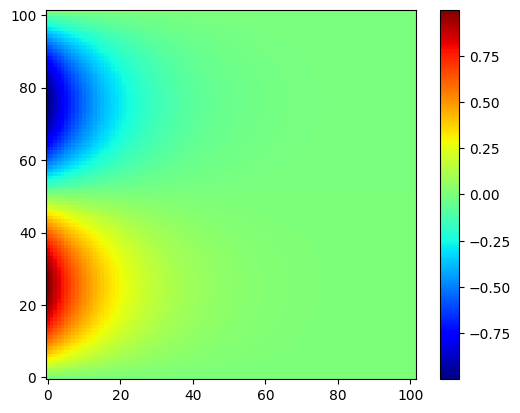

In [17]:
# -*- coding: utf-8 -*-
"""
2D poisson equation solving with Jacobi method
"""

import numpy as np
import matplotlib.pyplot as plt

#define the potential matrix
N  = 100
M  = 100
l2 = 1.0
eps = 0.0001

V0=np.zeros([M+2,N+2])
V1=np.zeros([M+2,N+2])
dx = 1.0/(N+2)
dy = 1.0/(M+2)

#apply boundary condition
#lets take first index as y axis and second index as x axis
V0[:,0]=1.0*np.sin(2*np.pi*np.linspace(0,1,M+2))
V1[:,0]=1.0*np.sin(2*np.pi*np.linspace(0,1,M+2))

step = 0
while (l2 > eps):

    #for i in range(1,M+1):
    #    for j in range(1,N+1):
    #        V1[i,j]=0.25*(V1[i+1,j]+V1[i-1,j]+V1[i,j+1]+V1[i,j-1])


    V1[1:M+1,1:N+1]=0.25*(V0[0:M,1:N+1]+V0[2:M+2,1:N+1]+V0[1:M+1,0:N]+V0[1:M+1,2:N+2])
    l2 = np.sqrt(np.sum((V1-V0)**2))
    V0 = np.copy(V1)
    print("step= ", step, "l2 = ", l2)
    step += 1
    
    
c = plt.imshow(V1, cmap ='jet',
                    interpolation ='nearest', origin ='lower') 
plt.colorbar(c)
plt.show()

This is <marquee direction="right" behavior="alternate" width="5%">Goofy<marquee/>

### Finite Difference Method in 2D

The Jacobi iteration becomes cumbersome for complicated functions of $s$. FDM is a general and stable method.

To speed up computation, we store the $N\times N$ grid as a $2N$ one dimensional array. $$(n,m) \to i = (m-1) N +n$$
$$m = \frac i N + 1$$
We pack all the points in the 2D space into a huge column matrix.
$$F = \begin{bmatrix}V_{1, 1} \\ V_{2, 1} \\ \vdots \\ V_{N, 1} \\ V_{2, 1} \\ V_{2, 2} \\ \vdots \\ \vdots \\ V_{N-1, M} \\ V_{N, M} \end{bmatrix}$$
Now we need a matrix $D_x$ which when multiplied on $F$ has the effect of taking the double derivative.
$$\frac{\partial^2 V_{n,m}}{\partial x^2} = \frac{V_{n+1,m}+V_{n-1,m}-V_{n,m}}{2}$$
$$\frac{\partial^2 V_{n,m}}{\partial y^2} = \frac{V_{n,m+1}+V_{n,m-1}-V_{n,m}}{2}$$


In [1]:
# Getting the Dy matrix

import numpy as np

M, N = 3, 3
Dy = np.zeros([N*M, N*M])

for n in range(1, N+1):
    for m in range(1, M+1):
        # create 1D label
        i = (m-1)*N+n
        Dy[i-1, i-1] = -2
        # if we are not in bottom boundary
        if m > 1:
            j = i - N # neighbour below
            Dy[i-1, j-1] = 1
        # if we are not in top boundary
        if m < M:
            j = i + N # neighbour above
            Dy[i-1, j-1] = 1

Dy

array([[-2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -2.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0., -2.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0., -2.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0., -2.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.,  0., -2.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0., -2.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0., -2.]])

The laplacian will act on $F : (D_x+D_y)F$ to give the finite difference form. We may create 4 boundary matrices to create the boundary conditions

In [ ]:
# bounds

Bleft = np.zeros([N*M])
for n in range(1, N+1):
    for m in range(1, M+1):
        i = (m-1)*N + n
        if n==1:
            Bleft[i] = V[0, j]*(1/dx**2)

#### Arbitrary Boundaries
We need to make a map matrix, hard code the boundary $M$. Then create an $F$ vector which will contain the number of $K$ internal points. 
$$F=(D_x+D_y)^{-1}(S-B)$$
Then from the $F$, map it back to the space